# Exploring restaurant review dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import urllib.request
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/tykimos/tykimos.github.io/master/warehouse/dataset/tarr_train.txt",
    filename="tarr_train.txt",
)

('tarr_train.txt', <http.client.HTTPMessage at 0x28ca9b5abd0>)

In [4]:
# 파일 가져오기
file = 'tarr_train.txt'

raw = pd.read_csv(file, sep='\t')
train_data = raw.copy()
print(train_data.shape)
train_data.head(2)

(300, 3)


,id,comment,label
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1


In [7]:
# 우리가 관심있는 것은 comment 컬럼 !
# 댓글의 글자수 확인하기 --> apply 함수 사용함.
train_data.comment, train_data.comment.apply(len)

(0                      여기 음식은 언제 와도 실망시키지 않아요. 최고!
 1      여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.
 2                         진짜 깔끔하고, 맛도 좋았어요. 추천합니다!
 3                        왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음
 4          인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!
                           ...                     
 295                  와우! 여기 라떼아트 진짜 예술이네요. 인스타갬성!!
 296       처음 와봤는데, 여기 분위기도 좋고 음식도 맛있어요. 좋은 경험이었어요!
 297           음... 여기 리뷰 왜 이래? 사진으로 봤을 때랑 너무 다르네요.
 298                직원들이 너무 친절해서 기분 좋게 먹고 왔습니다. 굿굿!
 299            제 입맛엔 안 맞았어요. 다른 분들은 괜찮았을지 모르겠지만...
 Name: comment, Length: 300, dtype: object,
 0      27
 1      43
 2      24
 3      25
 4      39
        ..
 295    29
 296    40
 297    36
 298    31
 299    35
 Name: comment, Length: 300, dtype: int64)

In [8]:
# 댓글 길이 컬럼 새로 만들어주기
train_data['comment_length'] = train_data.comment.apply(len)

In [11]:
# 댓글 길이에 대한 기초 통계량
train_data.comment_length.describe()

count    300.000000
mean      31.236667
std       10.682120
min        5.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       92.000000
Name: comment_length, dtype: float64

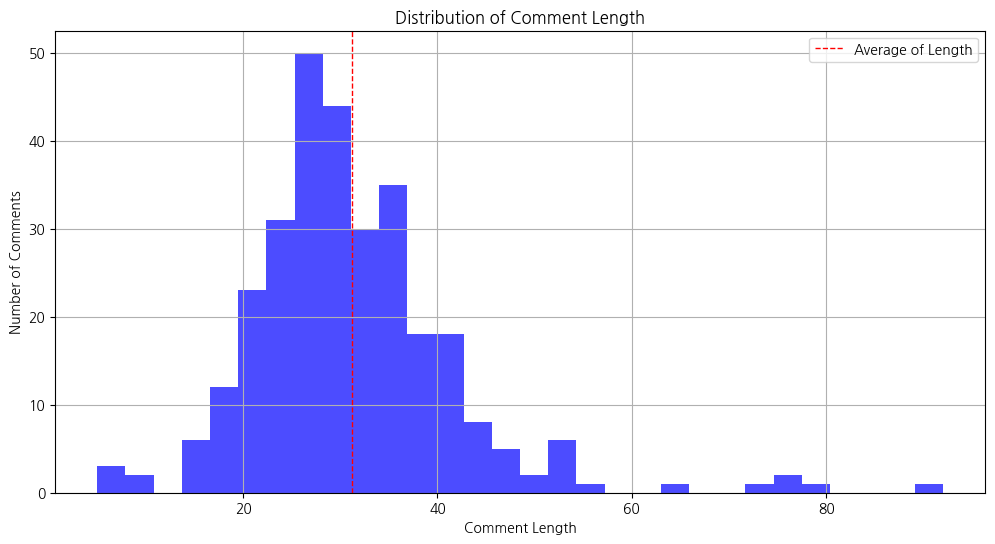

In [13]:
# 시각화하기 --> matplotlib
plt.figure(figsize=(12, 6))

# 그래프 그리기
plt.hist(train_data.comment_length, bins=30, color='blue', alpha=0.7)
plt.axvline(train_data.comment_length.mean(), color='red', linestyle='dashed', linewidth=1, label='Average of Length')

# 그래프 꾸미기
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid() # axis=''

plt.show()

In [17]:
train_data[train_data.label == 1]

,id,comment,label,comment_length
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1,27
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1,43
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1,24
4,5,인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!,1,39
5,6,메뉴 설명을 너무 친절하게 해주셔서 고르기 수월했어요.,1,30
...,...,...,...,...
290,291,음식 사진 찍기 좋아요. 인스타에 올릴 만해요!,1,26
294,295,"다 좋은데, 음악 볼륨만 좀 낮추면 완벽할 것 같아요!",1,30
295,296,와우! 여기 라떼아트 진짜 예술이네요. 인스타갬성!!,1,29
296,297,"처음 와봤는데, 여기 분위기도 좋고 음식도 맛있어요. 좋은 경험이었어요!",1,40


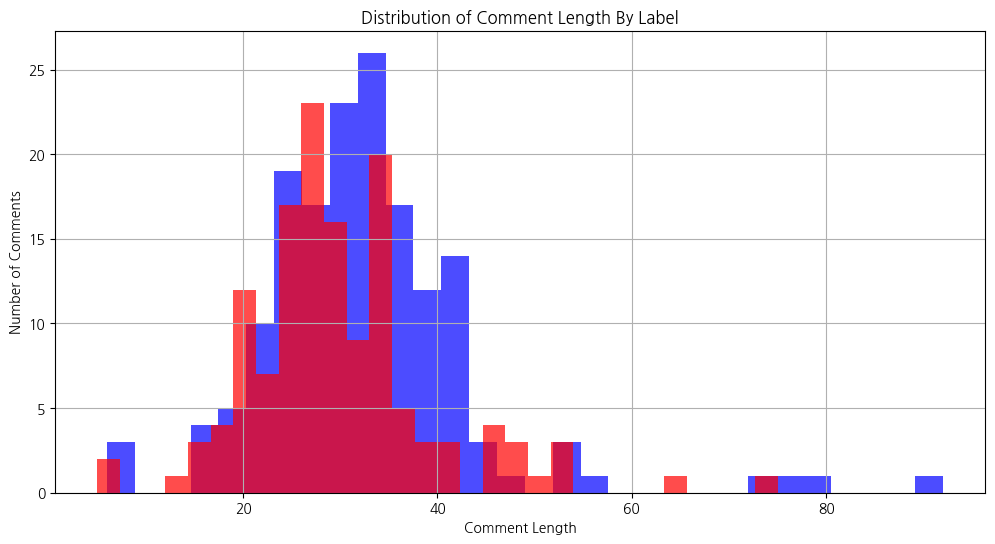

In [26]:
# 시각화하기 --> matplotlib
# label 분포
plt.figure(figsize=(12, 6))

# 그래프 그리기
plt.hist(x=train_data[train_data.label == 1].comment_length, bins=30, color='blue', alpha=0.7)
plt.hist(x=train_data[train_data.label == 0].comment_length, bins=30, color='red', alpha=0.7)

# 그래프 꾸미기
plt.title('Distribution of Comment Length By Label')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
# plt.legend()
plt.grid() # axis=''

plt.show()

In [19]:
from collections import Counter
import re

In [20]:
def get_word_frequencies(texts):
    words = []
    for text in texts:
        words.extend(re.findall(r'\b\w+\b', text)) # 구두점 제거 후 공백 기준 토큰화

    # 단어 빈도수 계산
    return Counter(words)

In [23]:
# 긍정 댓글인 경우
positive_comments = train_data[train_data.label == 1].comment
# 부정 댓글인 경우
negative_comments = train_data[train_data.label == 0].comment

print(positive_comments.head(2))
print(negative_comments.head(2))

0                    여기 음식은 언제 와도 실망시키지 않아요. 최고!
1    여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.
Name: comment, dtype: object
3    왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음
6       사진과 음식이 너무 달라서 실망했습니다.
Name: comment, dtype: object


In [28]:
# comment 토큰화
positive_word_freq = get_word_frequencies(positive_comments)
negative_word_freq = get_word_frequencies(negative_comments)

In [31]:
# 가장 많이 나온 상위 10개 뽑아주기
positive_word_TOP10 = positive_word_freq.most_common(10)
negative_word_TOP10 = negative_word_freq.most_common(10)

In [38]:
# 시각화 - wordcloud
from wordcloud import WordCloud

def generate_wordcloud(word_freq, title):
    wc = WordCloud(width=400, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, y=1.0)
    plt.axis('off')
    plt.show()

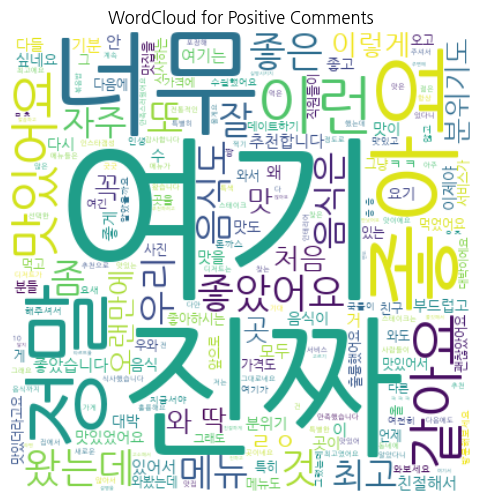

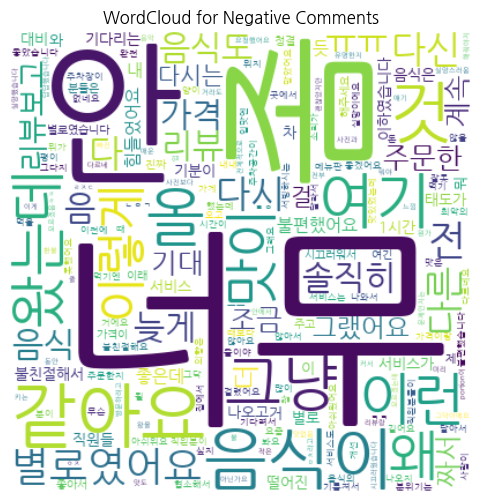

In [39]:
generate_wordcloud(positive_word_freq, 'WordCloud for Positive Comments')
generate_wordcloud(negative_word_freq, 'WordCloud for Negative Comments')

워드클라우드는 그냥 확인용이다. 분석 전, 어떤 단어가 있는지 확인하기 위한 용도이다.

따라서, 벡터화를 통해 수치로 분석하는 작업을 거쳐야 한다.

## CountVectorizer
* 문서에서 **단어의 빈도수**를 계산해서 문서 단어 행렬을 만들어주는 작업을 하는 모듈.
* fit_transform 메서드를 이용하면 문서 단어 행렬을 만들어줌.
* bag of words : 단어 순어를 고려하지 않은 채 텍스트를 수치화하는 방법 (그저 단어 빈도만 표현)
* 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range, top_n): # corpus : 말뭉치, ngram : 단어들의 조합 (bi-gram, tri-gram, ...)
    # 벡터화
    vectorizer = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    # 각 ngram의 총 빈도 계산
    bag_of_words = vectorizer.transform(corpus) # bag_of_words (단어 주머니) >> ngram의 빈도를 나타내는 행렬
    # 열 방향으로 더해주기
    sum_words = bag_of_words.sum(axis=0)
    # ngram과 그 빈도를 리스트로 변환하기 (>> 리스트 컴프리헨션 중요 !)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()] # vocabulary_ : (단어, 빈도수)
    # 정렬 (기준 : 빈도수 (sum_words), 방식 : 내림차순)
    words_freq = sorted(words_freq, key=lambda x : x[1], reverse=True)
    # top_n개 까지 출력
    return words_freq[:top_n]

* ngram_range
    * ngram의 범위를 지정하는 튜플 ex) (1, 2) :  uni-gram, bi-gram 모두 포함
    * (min,max)
* fit()를 사용해 주어진 corpus에 대해 벡터화 수행한다.
* 결과 : 각 ngram에 대한 어휘 사전을 구축할 수 있음.사전을 구축

In [41]:
get_top_ngrams(train_data.comment, ngram_range=(2, 2), top_n=10) # ngram_range : bigram 추출 (두 단어로 구성된 n-gram)

[('음식이 너무', 8),
 ('너무 친절해서', 5),
 ('친절해서 기분', 5),
 ('기분 좋게', 5),
 ('너무 짜서', 4),
 ('그냥 그랬어요', 4),
 ('분위기도 좋고', 4),
 ('서비스가 너무', 4),
 ('진짜 ㄹㅇ', 3),
 ('리뷰보고 왔는데', 3)]

In [42]:
# bi-gram
# positive
bigram_positive_TOP10 = get_top_ngrams(train_data[train_data.label == 1].comment, ngram_range=(2, 2), top_n=10)
# negative
bigram_negative_TOP10 = get_top_ngrams(train_data[train_data.label == 0].comment, ngram_range=(2, 2), top_n=10)

# tri-gram
# positive
trigram_positive_TOP10 = get_top_ngrams(train_data[train_data.label == 1].comment, ngram_range=(3, 3), top_n=10)
# negative
trigram_negative_TOP10 = get_top_ngrams(train_data[train_data.label == 0].comment, ngram_range=(3, 3), top_n=10)

* 간단한 예제

In [43]:
keywords = ['서비스', '가격', '맛', '분위기', '직원']

# keywords 리스트에 들어 있는 데이터의 개수 세서 저장한 딕셔너리 (key : keyword / value : keyword의 빈도수)
keyword_counts = {keyword : train_data.comment.str.count(keyword).sum() for keyword in keywords}
keyword_counts

{'서비스': 19, '가격': 19, '맛': 85, '분위기': 15, '직원': 20}

In [44]:
# keywords 리스트에 들어 있는 데이터의 개수 세서 저장한 딕셔너리 (key : keyword / value : keyword의 빈도수)
# positive
positive_keyword_counts = {keyword : train_data[train_data.label == 1].comment.str.count(keyword).sum() for keyword in keywords}
# negative
negative_keyword_counts = {keyword : train_data[train_data.label == 0].comment.str.count(keyword).sum() for keyword in keywords}

positive_keyword_counts, negative_keyword_counts

({'서비스': 8, '가격': 8, '맛': 63, '분위기': 13, '직원': 11},
 {'서비스': 11, '가격': 11, '맛': 22, '분위기': 2, '직원': 9})

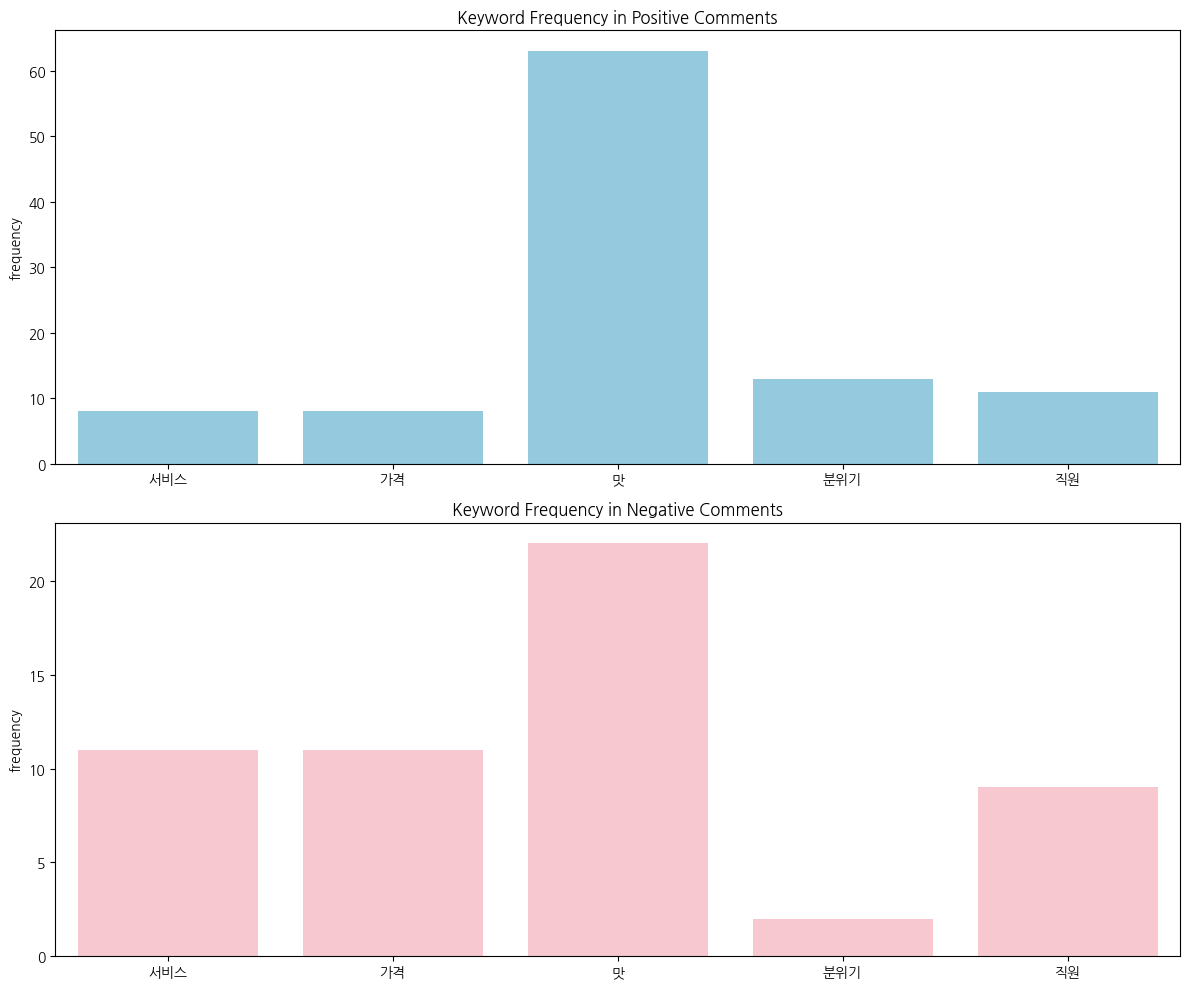

In [51]:
# 시각화 --> seaborn
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
# sns.set(grid=True)

# Positive
sns.barplot(x=list(positive_keyword_counts.keys()), y=list(positive_keyword_counts.values()), ax=ax[0], color='skyblue')
ax[0].set_title('Keyword Frequency in Positive Comments')
ax[0].set_ylabel('frequency')

# Negative
sns.barplot(x=list(negative_keyword_counts.keys()), y=list(negative_keyword_counts.values()), ax=ax[1], color='pink')
ax[1].set_title('Keyword Frequency in Negative Comments')
ax[1].set_ylabel('frequency')


plt.tight_layout()
plt.show()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# corpus에서 tfidf 점수가 가장 높은 top_n개의 단어를 반환하는 함수
def get_top_tfidf_features(corpus, top_n):
    # tfidf 행렬 생성
    vectorizer = TfidfVectorizer().fit(corpus)
    transformed = vectorizer.transform(corpus)
    # transfromed 행렬의 각 열의 평균 tfidf 값 계산 >> list로 변환
    mean_tfidf = transformed.mean(axis=0).tolist()[0]
    # mean_tfidf를 오름차순 정렬 후, 상위 n번째까지의 인덱스를 변수에 저장하기
    sorted_tfidf_index = np.argsort(mean_tfidf)[-top_n:] # argsort() : array를 오름차순 정렬하는 index의 array
    # 상위 n번째까지의 mean_tfidf값을 리스트에 담기
    sorted_tfidf_values = [mean_tfidf[idx] for idx in sorted_tfidf_index]
    # 상위 n번째까지의 단어를 리스트에 담기
    sorted_tfidf_features = [vectorizer.get_feature_names_out()[idx] for idx in sorted_tfidf_index]
    # 단어와 tfidf값을 튜플로 담고 (짝을 이룰 수 있도록) 다시 리스트에 저장하기
    return list(zip(sorted_tfidf_features, sorted_tfidf_values))

In [55]:
tfidf_features_TOP10 = get_top_tfidf_features(train_data.comment, 10)
tfidf_features_TOP10

[('그냥', 0.013687376648590821),
 ('정말', 0.014749058066344661),
 ('좋아요', 0.014972658609432315),
 ('음식이', 0.01691058446184101),
 ('왔는데', 0.017129225820536793),
 ('이런', 0.019819055177452125),
 ('같아요', 0.020639435969586072),
 ('진짜', 0.024167310616650294),
 ('여기', 0.031209780984430703),
 ('너무', 0.04233601334982538)]

In [58]:
tfidf_features_positive_TOP10 = get_top_tfidf_features(train_data[train_data.label == 1].comment, 10)
tfidf_features_negative_TOP10 = get_top_tfidf_features(train_data[train_data.label == 0].comment, 10)

tfidf_features_positive_TOP10, tfidf_features_negative_TOP10

([('좋은', 0.015794573515558488),
  ('왔는데', 0.016700611449025134),
  ('같아요', 0.01877905877210045),
  ('맛있어요', 0.020917787452746334),
  ('이런', 0.022451006535394235),
  ('정말', 0.025829318842390096),
  ('좋아요', 0.025855855648262004),
  ('너무', 0.034610136670802),
  ('진짜', 0.037387900220376004),
  ('여기', 0.04163214429506404)],
 [('이렇게', 0.015448051934657724),
  ('별로였어요', 0.017845587667163616),
  ('맛이', 0.02009740100089326),
  ('이런', 0.020486778220176298),
  ('왔는데', 0.020911414159821392),
  ('그냥', 0.02315386264694077),
  ('여기', 0.023508509590134744),
  ('같아요', 0.026674037078069108),
  ('음식이', 0.028554791673134402),
  ('너무', 0.05873634746611193)])

# 연습문제

In [59]:
corpus = [
    "I love machine learning and artificial intelligence",
    "Machine learning is fascinating",
    "I love learning new things about Gen-AI and ML"
]

get_top_tfidf_features(corpus, 5)

[('is', 0.194827633673355),
 ('and', 0.21797712997197954),
 ('love', 0.21797712997197954),
 ('machine', 0.2736150192293466),
 ('learning', 0.2843470255464275)]